In [3]:
%matplotlib inline
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import datetime
import re

import os
import json

In [4]:
def getShotChartDetail(p, startYear, endYear):
    headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/61.0.3163.100 Safari/537.36'}
    df_list_player=[]
    df_list_avg=[]
    for i in range(startYear, endYear+1):
        s=str(i-1)+'-'+str(i)[-2:]
        url="https://stats.nba.com/stats/shotchartdetail?ContextMeasure=FGA&DateFrom=&DateTo=&GameID=&GameSegment=&LastNGames=0&LeagueID=00&Location=&MeasureType=Base&Month=0&OpponentTeamID=0&Outcome=&Period=0&PlayerID={0}&PlayerPosition=&Position=&Season={1}&SeasonSegment=&SeasonType=Regular+Season&TeamID=0&VsConference=&VsDivision=&RookieYear=".format(p, s)
        response=requests.get(url, headers=headers)
        data=json.loads(response.text)
        tmpplayer=pd.DataFrame(data['resultSets'][0]['rowSet'], columns=data['resultSets'][0]['headers'])
        tmpavg=pd.DataFrame(data['resultSets'][1]['rowSet'], columns=data['resultSets'][1]['headers'])
        tmpplayer["Season"], tmpavg["Season"] = [i,i]
        df_list_player.append(tmpplayer)
        df_list_avg.append(tmpavg)
    return([pd.concat(df_list_player),pd.concat(df_list_avg)])

In [5]:
#kobe: 977, curry: 201939
kobe, avg=getShotChartDetail(977,1997,2016)
kobe.shape

(26198, 25)

In [10]:
curry=getShotChartDetail(201939,2010,2018)[0]
curry.shape

(10144, 25)

In [100]:
coward, avg2=getShotChartDetail(2730,2005,2018)
coward.shape

(10651, 25)

In [104]:
#json_list=list(map(lambda x: "json/"+x, os.listdir('json')))
#df_list_player=[]
#df_list_avg=[]
#for idx, i in enumerate(json_list):
#    with open(i) as j:
#        data=json.load(j)
#        tmpkobe=pd.DataFrame(data['resultSets'][0]['rowSet'], columns=data['resultSets'][0]['headers'])
#        tmpavg=pd.DataFrame(data['resultSets'][1]['rowSet'], columns=data['resultSets'][1]['headers'])
#        tmpkobe["Season"], tmpavg["Season"] = [i[9:13],i[9:13]]
#        df_list_player.append(tmpkobe)
#        df_list_avg.append(tmpavg)
#
#kobe = pd.concat(df_list_player)
#avg = pd.concat(df_list_avg)

In [22]:
#get summary of numerical data
kobe.describe()

,GAME_EVENT_ID,PLAYER_ID,TEAM_ID,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG
count,26198.000000,26198.0,2.619800e+04,26198.000000,26198.000000,26198.000000,26198.000000,26198.000000,26198.000000,26198.0,26198.000000
mean,249.470990,977.0,1.610613e+09,2.515230,4.864035,28.383121,13.471105,7.694175,91.065959,1.0,0.447248
std,150.332688,0.0,0.000000e+00,1.154735,3.444319,17.473047,9.366627,110.675088,87.550054,0.0,0.497219
min,2.000000,977.0,1.610613e+09,1.000000,0.000000,0.000000,0.000000,-250.000000,-44.000000,1.0,0.000000
25%,110.000000,977.0,1.610613e+09,1.000000,2.000000,13.000000,5.000000,-68.000000,4.000000,1.0,0.000000
50%,253.000000,977.0,1.610613e+09,3.000000,5.000000,28.000000,15.000000,0.000000,74.000000,1.0,0.000000
75%,368.000000,977.0,1.610613e+09,3.000000,8.000000,43.000000,21.000000,97.000000,160.000000,1.0,1.000000
max,659.000000,977.0,1.610613e+09,7.000000,11.000000,59.000000,74.000000,248.000000,741.000000,1.0,1.000000


In [7]:
pd.set_option('display.max_columns', None)
kobe

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM,Season
0,Shot Chart Detail,0029600027,102,977,Kobe Bryant,1610612747,Los Angeles Lakers,1,0,42,Missed Shot,Jump Shot,2PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,18,-140,116,1,0,19961103,LAL,MIN,1997
1,Shot Chart Detail,0029600031,127,977,Kobe Bryant,1610612747,Los Angeles Lakers,2,10,8,Missed Shot,Jump Shot,2PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,16,-131,97,1,0,19961105,NYK,LAL,1997
2,Shot Chart Detail,0029600044,124,977,Kobe Bryant,1610612747,Los Angeles Lakers,2,8,37,Made Shot,Jump Shot,3PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,23,-142,181,1,1,19961106,CHH,LAL,1997
3,Shot Chart Detail,0029600044,144,977,Kobe Bryant,1610612747,Los Angeles Lakers,2,6,34,Missed Shot,Jump Shot,3PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,0,0,1,0,19961106,CHH,LAL,1997
4,Shot Chart Detail,0029600044,151,977,Kobe Bryant,1610612747,Los Angeles Lakers,2,5,27,Made Shot,Jump Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),8-16 ft.,13,-10,138,1,1,19961106,CHH,LAL,1997
5,Shot Chart Detail,0029600057,157,977,Kobe Bryant,1610612747,Los Angeles Lakers,2,7,18,Missed Shot,Jump Shot,2PT Field Goal,Mid-Range,Right Side Center(RC),16-24 ft.,19,75,177,1,0,19961108,TOR,LAL,1997
6,Shot Chart Detail,0029600057,226,977,Kobe Bryant,1610612747,Los Angeles Lakers,2,2,16,Made Shot,Jump Shot,3PT Field Goal,Mid-Range,Center(C),16-24 ft.,23,-64,223,1,1,19961108,TOR,LAL,1997
7,Shot Chart Detail,0029600057,321,977,Kobe Bryant,1610612747,Los Angeles Lakers,3,3,25,Made Shot,Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,0,0,1,1,19961108,TOR,LAL,1997
8,Shot Chart Detail,0029600057,334,977,Kobe Bryant,1610612747,Los Angeles Lakers,3,1,53,Missed Shot,Jump Shot,2PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,19,-79,177,1,0,19961108,TOR,LAL,1997
9,Shot Chart Detail,0029600057,337,977,Kobe Bryant,1610612747,Los Angeles Lakers,3,1,14,Made Shot,Jump Shot,3PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,23,-103,207,1,1,19961108,TOR,LAL,1997


In [59]:
#check non-integer columns
intcol=[]
for c in kobe:
    if(kobe[c].dtype!="int64"):
        print("%s: " % c)
        print(kobe[c].value_counts())
        print("\n")
    else:
        intcol.append(c)
        
#potentially aggregate shot types
### CATEGORICAL MEANS

GRID_TYPE: 
Shot Chart Detail    26198
Name: GRID_TYPE, dtype: int64


GAME_ID: 
0021501228    50
0020200069    47
0020500591    46
0020600431    45
0020700553    44
0020601081    44
0020200743    41
0021200398    41
0020500480    41
0020200127    40
0020500988    39
0020600977    39
0020501078    38
0020200769    38
0020800884    38
0020600340    38
0020200142    37
0021400056    37
0020500412    37
0020900527    37
0020701082    37
0020601016    37
0020500192    36
0020500114    36
0020200372    35
0020600994    35
0020000267    35
0020500563    35
0020200223    35
0020500130    35
              ..
0029600112     4
0029601162     4
0021200971     4
0029701022     4
0020001059     4
0029600432     3
0029600991     3
0029600488     3
0029600044     3
0029600072     3
0029600362     3
0029600727     3
0029600219     2
0029600095     2
0029600844     2
0029600382     2
0029600781     2
0020400518     2
0029600086     2
0029600136     2
0021500906     2
0029600202     1
0029700933     1
0

In [37]:
if not 'ACTION_TYPE2' in kobe.columns: kobe['ACTION_TYPE2']=kobe.ACTION_TYPE
shot_labels={"Dunk":"Dunk Shot","Layup|Finger":"Layup Shot","Hook":"Hook Shot","Jump|Bank|Fadeaway":"Jump Shot","Tip":"Tip Shot"}
for k, v in shot_labels.items():
    kobe.loc[kobe.ACTION_TYPE.str.contains(k),"ACTION_TYPE"] = v
kobe.ACTION_TYPE.value_counts()

Jump Shot     20107
Layup Shot     4648
Dunk Shot      1121
Hook Shot       169
Tip Shot        153
Name: ACTION_TYPE, dtype: int64

In [27]:
print(kobe[intcol[1]].value_counts())
print("\n")
print(kobe[intcol[2]].value_counts())

977    26198
Name: PLAYER_ID, dtype: int64


1610612747    26198
Name: TEAM_ID, dtype: int64


No apparent erroneous data points as for non-numerical columns. Checking for outliers in numerical data in the following.

(array([1, 2, 3, 4, 5, 6, 7, 8]), <a list of 8 Text xticklabel objects>)

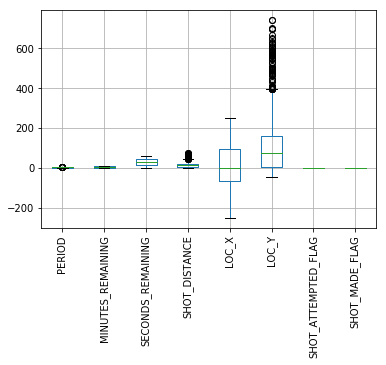

In [28]:
#boxplot to detect outliers
bp=kobe.boxplot(column=intcol[3:], return_type="both")
plt.xticks(rotation=90)

['PERIOD', 'SHOT_DISTANCE', 'LOC_Y']

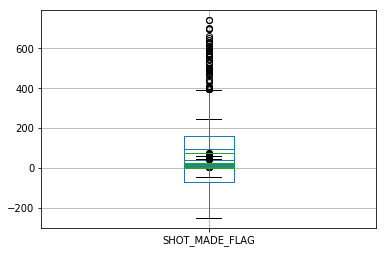

In [29]:
tmp=[]
for i in intcol[3:]:
    if (max(kobe[i]) > kobe.boxplot(column=i, return_type="both").lines["whiskers"][1].get_ydata()[1] or max(kobe[i]) < kobe.boxplot(column=i, return_type="both").lines["whiskers"][0].get_ydata()[1]):
        tmp.append(i)
tmp

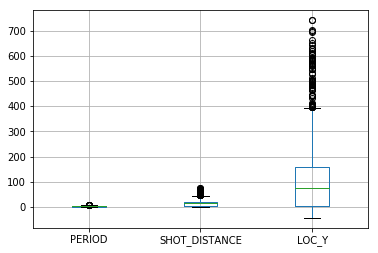

In [30]:
outliers=kobe.boxplot(column=tmp, return_type="both")

In [31]:
kobe.PERIOD.value_counts()

3    7113
1    6915
4    6132
2    5710
5     283
6      38
7       7
Name: PERIOD, dtype: int64

In [140]:
#filter dataset for outliers
kobe[kobe.PERIOD>=outliers.lines["whiskers"][1].get_ydata()[1]]

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM,Season
151,Shot Chart Detail,0029600545,498,977,Kobe Bryant,1610612747,Los Angeles Lakers,6,4,14,Missed Shot,Jump Shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,27,-109,249,1,0,19970118,LAL,DET,1997
152,Shot Chart Detail,0029600545,515,977,Kobe Bryant,1610612747,Los Angeles Lakers,6,1,12,Missed Shot,Jump Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),Less Than 8 ft.,5,-23,54,1,0,19970118,LAL,DET,1997
493,Shot Chart Detail,0029900582,528,977,Kobe Bryant,1610612747,Los Angeles Lakers,6,4,29,Missed Shot,Jump Shot,2PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,21,-126,179,1,0,20000124,UTA,LAL,2000
494,Shot Chart Detail,0029900582,567,977,Kobe Bryant,1610612747,Los Angeles Lakers,6,0,12,Missed Shot,Jump Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),8-16 ft.,10,-8,106,1,0,20000124,UTA,LAL,2000
495,Shot Chart Detail,0029900582,586,977,Kobe Bryant,1610612747,Los Angeles Lakers,6,0,1,Made Shot,Jump Shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,38,-154,349,1,1,20000124,UTA,LAL,2000
1563,Shot Chart Detail,0020101159,584,977,Kobe Bryant,1610612747,Los Angeles Lakers,6,1,19,Missed Shot,Jump Shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,24,-185,156,1,0,20020414,POR,LAL,2002
1228,Shot Chart Detail,0020200769,542,977,Kobe Bryant,1610612747,Los Angeles Lakers,6,2,46,Made Shot,Driving Dunk Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,0,0,1,1,20030218,LAL,HOU,2003
1229,Shot Chart Detail,0020200769,568,977,Kobe Bryant,1610612747,Los Angeles Lakers,6,0,52,Made Shot,Jump Shot,2PT Field Goal,Mid-Range,Right Side Center(RC),16-24 ft.,18,108,156,1,1,20030218,LAL,HOU,2003
1230,Shot Chart Detail,0020200769,578,977,Kobe Bryant,1610612747,Los Angeles Lakers,6,0,19,Missed Shot,Jump Shot,3PT Field Goal,Above the Break 3,Center(C),24+ ft.,25,-18,250,1,0,20030218,LAL,HOU,2003
70,Shot Chart Detail,0020300064,584,977,Kobe Bryant,1610612747,Los Angeles Lakers,6,4,38,Made Shot,Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,2,6,22,1,1,20031106,SAS,LAL,2004


Overtime shots

In [33]:
#shot distance outliers
#kobe[kobe.SHOT_DISTANCE>=outliers.lines["whiskers"][3].get_ydata()[1]][["MINUTES_REMAINING","SECONDS_REMAINING"]].describe()
kobe[kobe.SHOT_DISTANCE>=outliers.lines["whiskers"][3].get_ydata()[1]]

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM,Season
812,Shot Chart Detail,0029701055,395,977,Kobe Bryant,1610612747,Los Angeles Lakers,3,0,1,...,Back Court Shot,58,126,574,1,0,19980402,NJN,LAL,1998
888,Shot Chart Detail,0029701173,99,977,Kobe Bryant,1610612747,Los Angeles Lakers,1,0,0,...,Back Court Shot,53,175,501,1,0,19980417,LAL,DAL,1998
94,Shot Chart Detail,0029800071,235,977,Kobe Bryant,1610612747,Los Angeles Lakers,2,0,0,...,Back Court Shot,58,-14,585,1,0,19990214,LAL,IND,1999
424,Shot Chart Detail,0029900537,108,977,Kobe Bryant,1610612747,Los Angeles Lakers,1,0,0,...,Back Court Shot,59,70,591,1,0,20000117,LAL,SEA,2000
1147,Shot Chart Detail,0029901171,97,977,Kobe Bryant,1610612747,Los Angeles Lakers,1,0,0,...,Back Court Shot,48,123,465,1,0,20000418,DAL,LAL,2000
177,Shot Chart Detail,0020000124,212,977,Kobe Bryant,1610612747,Los Angeles Lakers,2,0,0,...,Back Court Shot,47,47,477,1,0,20001116,SAC,LAL,2001
322,Shot Chart Detail,0020000222,115,977,Kobe Bryant,1610612747,Los Angeles Lakers,1,0,0,...,Back Court Shot,48,-150,466,1,0,20001130,SEA,LAL,2001
397,Shot Chart Detail,0020000258,119,977,Kobe Bryant,1610612747,Los Angeles Lakers,1,0,0,...,24+ ft.,45,231,394,1,0,20001205,LAL,PHI,2001
585,Shot Chart Detail,0020000347,114,977,Kobe Bryant,1610612747,Los Angeles Lakers,1,0,0,...,Back Court Shot,62,100,620,1,0,20001217,TOR,LAL,2001
1073,Shot Chart Detail,0020000702,246,977,Kobe Bryant,1610612747,Los Angeles Lakers,2,0,0,...,Back Court Shot,70,106,696,1,0,20010207,LAL,PHX,2001


In [34]:
#kobe[kobe.LOC_Y>=outliers.lines["whiskers"][5].get_ydata()[1]][["MINUTES_REMAINING","SECONDS_REMAINING"]].describe()
kobe[kobe.LOC_Y>=outliers.lines["whiskers"][5].get_ydata()[1]]

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM,Season
603,Shot Chart Detail,0029700748,503,977,Kobe Bryant,1610612747,Los Angeles Lakers,4,0,0,...,24+ ft.,42,-160,396,1,0,19980218,PHX,LAL,1998
812,Shot Chart Detail,0029701055,395,977,Kobe Bryant,1610612747,Los Angeles Lakers,3,0,1,...,Back Court Shot,58,126,574,1,0,19980402,NJN,LAL,1998
888,Shot Chart Detail,0029701173,99,977,Kobe Bryant,1610612747,Los Angeles Lakers,1,0,0,...,Back Court Shot,53,175,501,1,0,19980417,LAL,DAL,1998
893,Shot Chart Detail,0029701173,335,977,Kobe Bryant,1610612747,Los Angeles Lakers,3,0,0,...,Back Court Shot,43,-175,403,1,0,19980417,LAL,DAL,1998
905,Shot Chart Detail,0029701187,234,977,Kobe Bryant,1610612747,Los Angeles Lakers,2,0,0,...,Back Court Shot,44,-74,443,1,0,19980419,LAL,UTA,1998
94,Shot Chart Detail,0029800071,235,977,Kobe Bryant,1610612747,Los Angeles Lakers,2,0,0,...,Back Court Shot,58,-14,585,1,0,19990214,LAL,IND,1999
424,Shot Chart Detail,0029900537,108,977,Kobe Bryant,1610612747,Los Angeles Lakers,1,0,0,...,Back Court Shot,59,70,591,1,0,20000117,LAL,SEA,2000
427,Shot Chart Detail,0029900537,234,977,Kobe Bryant,1610612747,Los Angeles Lakers,2,0,0,...,Back Court Shot,40,1,400,1,0,20000117,LAL,SEA,2000
1147,Shot Chart Detail,0029901171,97,977,Kobe Bryant,1610612747,Los Angeles Lakers,1,0,0,...,Back Court Shot,48,123,465,1,0,20000418,DAL,LAL,2000
177,Shot Chart Detail,0020000124,212,977,Kobe Bryant,1610612747,Los Angeles Lakers,2,0,0,...,Back Court Shot,47,47,477,1,0,20001116,SAC,LAL,2001


In [36]:
hc=kobe[kobe.LOC_Y>=outliers.lines["whiskers"][5].get_ydata()[1]].loc[[kobe[kobe.LOC_Y>=outliers.lines["whiskers"][5].get_ydata()[1]]["SECONDS_REMAINING"].idxmax()]]

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM,Season
280,Shot Chart Detail,0021400169,349,977,Kobe Bryant,1610612747,Los Angeles Lakers,3,2,14,...,Back Court Shot,49,-46,490,1,0,20141119,HOU,LAL,2015


Outliers is SHOT_DISTANCE and LOC_Y match up. With 0 seconds remaining in the period, these outliers can be explained as last second full-court heaves.
We now assume that the dataset is clean and without errors.

##### Visualisation

In [13]:
from matplotlib.patches import Circle, Rectangle, Arc

def add_patches(p):
    ax=plt.gca()
    for i in p:
        ax.add_patch(i)

In [108]:
def plot_shotchart(sc,hb=False):
    fig, ax = plt.subplots(ncols=1, sharey=True, figsize=(9, 12))
    #plt.figure(figsize=(9,12))
    plt.xlim(-300,300)
    plt.ylim(-100,700)
    
    if hb:
        c = 'white' 
    else:
        c = 'black'
    patches = [Rectangle((-250, -47.5), 500, 0, linewidth=2, color=c),
    Rectangle((-250, -47.5), 0, 940, linewidth=2, color=c),
    Rectangle((250, -47.5), 0, 940, linewidth=2, color=c),
    Rectangle((-250, 422.5), 500, 0, linewidth=2, color=c),
    Rectangle((-220, -47.5), 0, 140, linewidth=2, color=c),
    Rectangle((220, -47.5), 0, 140, linewidth=2, color=c),
    Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=2, color=c),
    Rectangle((-30, -7.5), 60, 0, linewidth=4, color=c),
    Circle((0, 0), 7.5, linewidth=2, color=c, fill=False),
    Circle((0, 142.5), 60, linewidth=2, color=c, fill=False),
    Rectangle((-60, 142.5), 120, 0, linewidth=2, color=c),
    Rectangle((-60, -47.5), 120, 190, linewidth=2, color=c, fill=False),
    Rectangle((-80, -47.5), 160, 190, linewidth=2, color=c, fill=False)]

    add_patches(patches)
    colors=["#f75036", "#37f275"]
    labs=["FG Missed", "FG Made"]
    
    if(not hb):
        for i in [0,1]:
            fg=sc[sc.SHOT_MADE_FLAG==i][["LOC_X","LOC_Y"]]
            plt.scatter(-fg.LOC_X, fg.LOC_Y, s=2, c=colors[i], label=labs[i])
        plt.legend()
    else:
        hb = ax.hexbin(sc.LOC_X, sc.LOC_Y, cmap="inferno", gridsize=36, bins='log')
        cb = fig.colorbar(hb, ax=ax)

    plt.show()

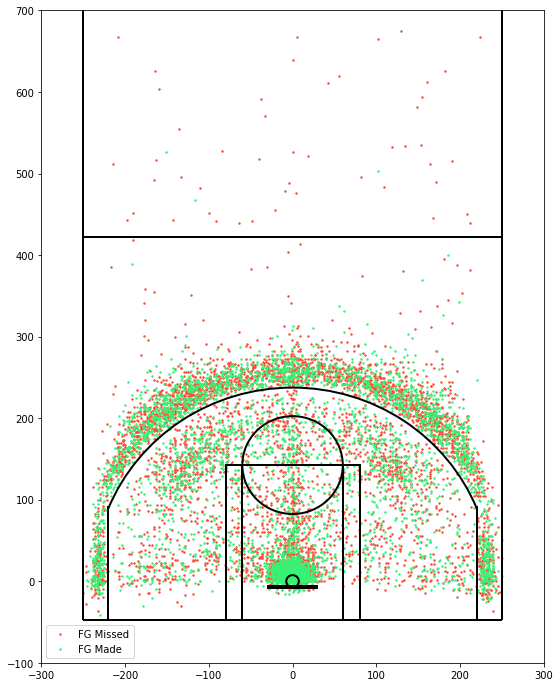

In [111]:
plot_shotchart(curry,False)

In [203]:
kobe.SHOT_ZONE_AREA.value_counts()
#groupby date, timeseries

Center(C)                11396
Right Side Center(RC)     4144
Right Side(R)             3940
Left Side Center(LC)      3475
Left Side(L)              3176
Back Court(BC)              67
Name: SHOT_ZONE_AREA, dtype: int64

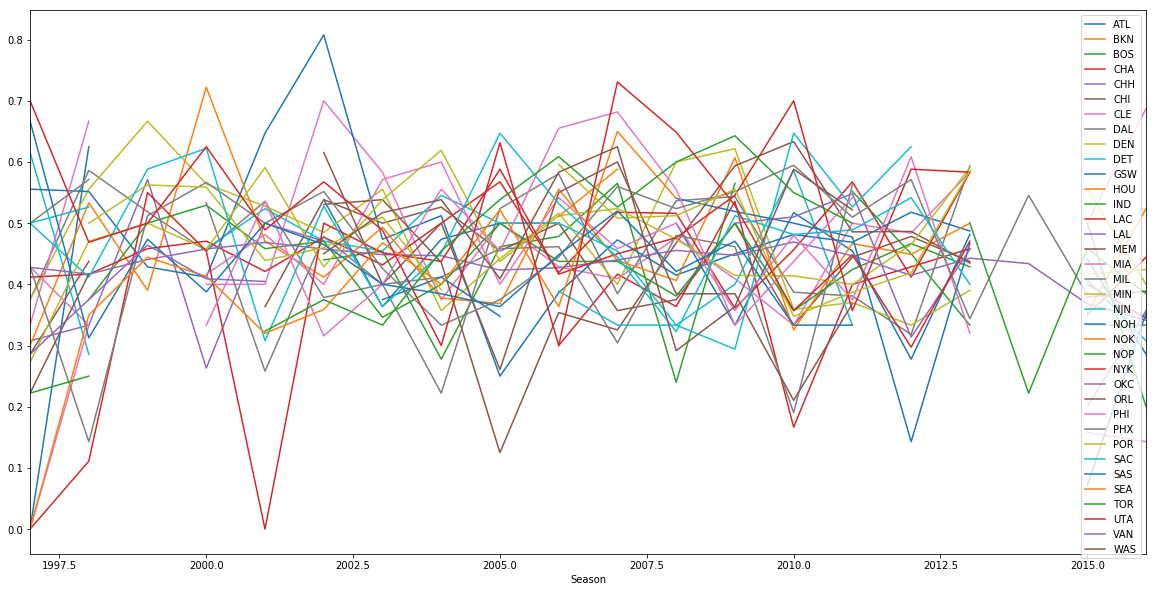

In [21]:
a=kobe.groupby(['Season','VTM'])['SHOT_ATTEMPTED_FLAG','SHOT_MADE_FLAG'].sum()
b=pd.DataFrame(a.SHOT_MADE_FLAG.div(a.SHOT_ATTEMPTED_FLAG)).unstack()
b.columns=b.columns.droplevel()
b=b.reset_index()
del b.columns.name
b.plot(x='Season',figsize=(20, 10))

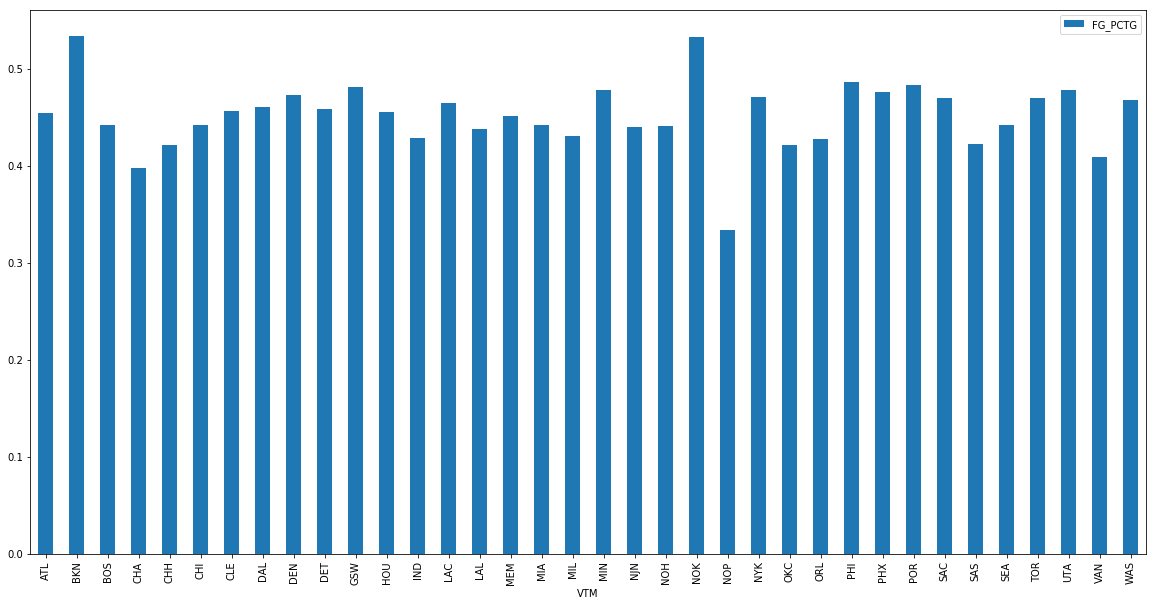

In [30]:
a=kobe.groupby('VTM')['SHOT_ATTEMPTED_FLAG','SHOT_MADE_FLAG'].sum()
a=a.reset_index()
a['FG_PCTG']=a.SHOT_MADE_FLAG.div(a.SHOT_ATTEMPTED_FLAG)
a.plot(x='VTM',y='FG_PCTG',kind='bar',figsize=(20, 10))

In [350]:
print("Career FG%: {0:.2f}%".format((kobe[kobe.SHOT_MADE_FLAG==1].shape[0]/kobe.shape[0]) * 100))

Career FG%: 44.72%


In [32]:
df

,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,ACTION_TYPE,SHOT_ZONE_AREA,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,1,0,42,Jump Shot,Left Side Center(LC),18,-140,116,0,19961103,LAL,MIN
1,2,10,8,Jump Shot,Left Side Center(LC),16,-131,97,0,19961105,NYK,LAL
2,2,8,37,Jump Shot,Left Side Center(LC),23,-142,181,1,19961106,CHH,LAL
3,2,6,34,Jump Shot,Center(C),0,0,0,0,19961106,CHH,LAL
4,2,5,27,Jump Shot,Center(C),13,-10,138,1,19961106,CHH,LAL
5,2,7,18,Jump Shot,Right Side Center(RC),19,75,177,0,19961108,TOR,LAL
6,2,2,16,Jump Shot,Center(C),23,-64,223,1,19961108,TOR,LAL
7,3,3,25,Layup Shot,Center(C),0,0,0,1,19961108,TOR,LAL
8,3,1,53,Jump Shot,Left Side Center(LC),19,-79,177,0,19961108,TOR,LAL
9,3,1,14,Jump Shot,Left Side Center(LC),23,-103,207,1,19961108,TOR,LAL


In [66]:
df=kobe[['PERIOD','MINUTES_REMAINING','SECONDS_REMAINING','ACTION_TYPE','SHOT_ZONE_AREA','SHOT_DISTANCE','LOC_X','LOC_Y','SHOT_MADE_FLAG','GAME_DATE','HTM','VTM','Season']].copy()
df['GAME_DATE']=df.GAME_DATE.apply(lambda x: datetime.datetime.strptime(x, '%Y%m%d'))
df['OPP']=np.where(df.HTM=='LAL', df.VTM, df.HTM)
df=df.drop('VTM', axis=1)
df['SHOT_ZONE_AREA']=df.SHOT_ZONE_AREA.apply(lambda x: re.sub('\(\S*\)','',x))
v
df['SECONDS_REMAINING']=df.SECONDS_REMAINING+df.MINUTES_REMAINING*60
df=df.drop(['SHOT_ZONE_AREA','HTM','MINUTES_REMAINING','ACTION_TYPE','OPP','GAME_DATE'],axis=1)


In [62]:
for i in df.columns: print(df[i].dtype.name)

int64
int64
int64
int64
int64
int64
datetime64[ns]
int64


In [62]:
#temp=kobe.EVENT_TYPE
#temp=temp.replace("Missed Shot",0)
#temp=temp.replace("Made Shot",1)
#(temp==kobe.SHOT_MADE_FLAG).value_counts()

True    26198
dtype: int64

In [51]:
import sklearn
from sklearn import model_selection
#from sklearn.linear_model import LogisticRegression
#from sklearn.feature_selection import RFE

In [ ]:
cat=[]
for i in df.columns:
    #print(type(df[i].dtype))
    if df[i].dtype.name=='category': cat.append(i)
cat

In [49]:
##enc=preprocessing.OneHotEncoder(n_values='auto', categorical_features=cat)
##enc.fit(X)
#datadummies=pd.get_dummies(df)
##list(datadummies.columns)
#features=datadummies.loc[:,:]
#features.values.shape
df=pd.get_dummies(df)
df.shape

(26198, 47)

In [63]:
ttsplit=sklearn.model_selection.train_test_split(pd.get_dummies(df),train_size=0.9,test_size=0.1)
train_data=ttsplit[0]
test_data=ttsplit[1]
print (train_data.shape, test_data.shape)

(23578, 8) (2620, 8)


In [54]:
X = tf.placeholder(tf.float32, [None, 47])
y = tf.placeholder(tf.float32, [None, 1])

In [152]:
x_data

,PERIOD,SECONDS_REMAINING,SHOT_DISTANCE,LOC_X,LOC_Y,Season
903,2,218,18,89,158,1998
501,1,630,13,-95,92,2007
688,3,169,2,2,25,2011
376,4,170,4,-18,41,2006
758,1,143,25,-154,197,2005
969,1,655,0,0,0,2006
1064,3,291,24,51,243,2003
180,1,391,12,54,108,2010
404,3,432,6,-11,63,2003
606,1,119,5,7,57,2002


In [67]:
PERIOD = tf.feature_column.numeric_column('PERIOD')
SECONDS_REMAINING = tf.feature_column.numeric_column('SECONDS_REMAINING')
SHOT_DISTANCE = tf.feature_column.numeric_column('SHOT_DISTANCE')
LOC_X = tf.feature_column.numeric_column('LOC_X')
LOC_Y = tf.feature_column.numeric_column('LOC_Y')
Season = tf.feature_column.numeric_column('Season')

In [136]:
season_buckets = tf.feature_column.bucketized_column(Season, boundaries=[2000,2004,2008,2012])
LOC_X_buckets = tf.feature_column.bucketized_column(LOC_X, boundaries=[0])

In [153]:
base_columns=[PERIOD, SECONDS_REMAINING, SHOT_DISTANCE,LOC_X,LOC_Y,Season]

In [155]:
os.makedirs("temp3")
model_dir=os.path.abspath("temp3")
model=tf.estimator.LinearClassifier(model_dir=model_dir, feature_columns=base_columns)
#auto bias term

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\dwan0\\Documents\\Python Scripts\\project\\PythonProject\\temp3', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000240AADCD358>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [110]:
x_data=train_data.drop(['SHOT_MADE_FLAG','GAME_DATE'],axis=1)
y_data=train_data.SHOT_MADE_FLAG

x_data_test=test_data.drop(['SHOT_MADE_FLAG','GAME_DATE'],axis=1)
y_data_test=test_data.SHOT_MADE_FLAG

In [163]:
model.train(input_fn=tf.estimator.inputs.pandas_input_fn(x=x_data,y=y_data,shuffle=False))

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from C:\Users\dwan0\Documents\Python Scripts\project\PythonProject\temp3\model.ckpt-185
INFO:tensorflow:Saving checkpoints for 186 into C:\Users\dwan0\Documents\Python Scripts\project\PythonProject\temp3\model.ckpt.
INFO:tensorflow:loss = 1008.47, step = 186
INFO:tensorflow:global_step/sec: 331.875
INFO:tensorflow:loss = 591.38, step = 286 (0.304 sec)
INFO:tensorflow:Saving checkpoints for 370 into C:\Users\dwan0\Documents\Python Scripts\project\PythonProject\temp3\model.ckpt.
INFO:tensorflow:Loss for final step: 81.529.


In [157]:
results = model.evaluate(input_fn=tf.estimator.inputs.pandas_input_fn(x=x_data,y=y_data,shuffle=True))

INFO:tensorflow:Starting evaluation at 2018-01-13-17:18:53
INFO:tensorflow:Restoring parameters from C:\Users\dwan0\Documents\Python Scripts\project\PythonProject\temp3\model.ckpt-185
INFO:tensorflow:Finished evaluation at 2018-01-13-17:18:55
INFO:tensorflow:Saving dict for global step 185: accuracy = 0.49173, accuracy_baseline = 0.552931, auc = 0.554083, auc_precision_recall = 0.68076, average_loss = 5.59373, global_step = 185, label/mean = 0.447069, loss = 712.913, prediction/mean = 0.876264


In [164]:
results_test = model.evaluate(input_fn=tf.estimator.inputs.pandas_input_fn(x=x_data_test,y=y_data_test,shuffle=True))

INFO:tensorflow:Starting evaluation at 2018-01-13-17:30:50
INFO:tensorflow:Restoring parameters from C:\Users\dwan0\Documents\Python Scripts\project\PythonProject\temp3\model.ckpt-370
INFO:tensorflow:Finished evaluation at 2018-01-13-17:30:51
INFO:tensorflow:Saving dict for global step 370: accuracy = 0.476718, accuracy_baseline = 0.551145, auc = 0.589651, auc_precision_recall = 0.598298, average_loss = 1.90246, global_step = 370, label/mean = 0.448855, loss = 237.354, prediction/mean = 0.882792


In [145]:
results

{'accuracy': 0.56154042,
 'accuracy_baseline': 0.55293071,
 'auc': 0.57588869,
 'auc_precision_recall': 0.51894069,
 'average_loss': 1.6683968,
 'global_step': 185,
 'label/mean': 0.44706929,
 'loss': 212.63492,
 'prediction/mean': 0.09245351}

In [146]:
results_test

{'accuracy': 0.56259543,
 'accuracy_baseline': 0.55114508,
 'auc': 0.58984363,
 'auc_precision_recall': 0.52942014,
 'average_loss': 1.6337005,
 'global_step': 185,
 'label/mean': 0.44885495,
 'loss': 203.82359,
 'prediction/mean': 0.089526266}

In [117]:
type(tf.estimator.inputs.pandas_input_fn(x=x_data,y=y_data,shuffle=True))

function

In [162]:
model = tf.estimator.LinearClassifier(
    model_dir=model_dir, feature_columns=base_columns,
    optimizer=tf.train.FtrlOptimizer(
        learning_rate=0.1,
        l1_regularization_strength=1.0,
        l2_regularization_strength=1.0))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\dwan0\\Documents\\Python Scripts\\project\\PythonProject\\temp3', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000240A949E898>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [158]:
model.get_variable_names()

['global_step',
 'linear/linear_model/LOC_X/weights',
 'linear/linear_model/LOC_X/weights/part_0/Ftrl',
 'linear/linear_model/LOC_X/weights/part_0/Ftrl_1',
 'linear/linear_model/LOC_Y/weights',
 'linear/linear_model/LOC_Y/weights/part_0/Ftrl',
 'linear/linear_model/LOC_Y/weights/part_0/Ftrl_1',
 'linear/linear_model/PERIOD/weights',
 'linear/linear_model/PERIOD/weights/part_0/Ftrl',
 'linear/linear_model/PERIOD/weights/part_0/Ftrl_1',
 'linear/linear_model/SECONDS_REMAINING/weights',
 'linear/linear_model/SECONDS_REMAINING/weights/part_0/Ftrl',
 'linear/linear_model/SECONDS_REMAINING/weights/part_0/Ftrl_1',
 'linear/linear_model/SHOT_DISTANCE/weights',
 'linear/linear_model/SHOT_DISTANCE/weights/part_0/Ftrl',
 'linear/linear_model/SHOT_DISTANCE/weights/part_0/Ftrl_1',
 'linear/linear_model/Season/weights',
 'linear/linear_model/Season/weights/part_0/Ftrl',
 'linear/linear_model/Season/weights/part_0/Ftrl_1',
 'linear/linear_model/bias_weights',
 'linear/linear_model/bias_weights/part_0

In [161]:
model.get_variable_value('linear/linear_model/LOC_Y/weights')

array([[-0.05722742]], dtype=float32)

In [206]:
with tf.name_scope("Declaring_placeholder"):
    X=tf.placeholder(tf.float32, [None, 6],name="placeholderX")
    y=tf.placeholder(tf.float32, [None, 1],name="placeholdery")


In [207]:
with tf.name_scope("Declaring_variables"):
    W = tf.Variable(tf.zeros([6, 1]))
    b = tf.Variable(tf.zeros([1]))
with tf.name_scope("Declaring_functions"):
    y_ = tf.nn.softmax(tf.add(tf.matmul(X, W), b))
with tf.name_scope("calculating_cost"):
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=y_)
with tf.name_scope("declaring_gradient_descent"):
    train_step = tf.train.GradientDescentOptimizer(learning_rate=0.0001).minimize(cross_entropy)

In [201]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

In [230]:
with tf.name_scope("starting_tensorflow_session"):
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for _ in range(1000):
            sess.run(train_step, feed_dict={X: x_data, y: pd.DataFrame(y_data)})
        correct_prediction = tf.equal(tf.argmax(y_, 1), tf.argmax(y, 1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
        print("Accuracy:", accuracy.eval({X: x_data_test, y: pd.DataFrame(y_data_test)}))
        #print(tf.global_variables())
        sess.run(W)

Accuracy: 1.0
[<tf.Variable 'Declaring_variables/Variable:0' shape=(6, 1) dtype=float32_ref>, <tf.Variable 'Declaring_variables/Variable_1:0' shape=(1,) dtype=float32_ref>, <tf.Variable 'Declaring_variables_1/Variable:0' shape=(6, 1) dtype=float32_ref>, <tf.Variable 'Declaring_variables_1/Variable_1:0' shape=(1,) dtype=float32_ref>, <tf.Variable 'Declaring_variables_2/Variable:0' shape=(6, 1) dtype=float32_ref>, <tf.Variable 'Declaring_variables_2/Variable_1:0' shape=(1,) dtype=float32_ref>]


In [229]:
with tf.Session() as sess:
    sess.run(W)

FailedPreconditionError: Attempting to use uninitialized value Declaring_variables_2/Variable
	 [[Node: _retval_Declaring_variables_2/Variable_0_0 = _Retval[T=DT_FLOAT, index=0, _device="/job:localhost/replica:0/task:0/device:CPU:0"](Declaring_variables_2/Variable)]]